In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) 
# setting the style of the notebook to be monokai theme  
# this line of code is important to ensure that we are able to see the x and y axes clearly
# If you don't run this code line, you will notice that the xlabel and ylabel on any plot is black on black and it will be hard to see them. 

In [14]:
# Load the data
reviews_df = pd.read_csv('amazon_reviews.csv')
reviews_df

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


In [15]:
# View the DataFrame Information
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3149 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [16]:
# View DataFrame Statistical Summary
reviews_df.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [17]:
reviews_df.drop(columns=['date'], inplace=True)
reviews_df

,rating,variation,verified_reviews,feedback
0,5,Charcoal Fabric,Love my Echo!,1
1,5,Charcoal Fabric,Loved it!,1
2,4,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,Charcoal Fabric,Music,1
...,...,...,...,...
3145,5,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,Black Dot,"Listening to music, searching locations, check...",1
3147,5,Black Dot,"I do love these things, i have them running my...",1
3148,5,White Dot,Only complaint I have is that the sound qualit...,1


<Axes: >

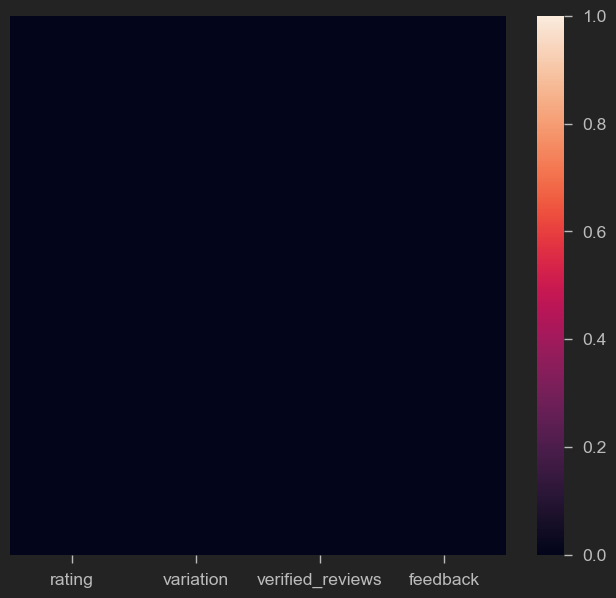

In [18]:
sns.heatmap(reviews_df.isnull(), yticklabels=False)

In [19]:
reviews_df.isnull()

,rating,variation,verified_reviews,feedback
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
3145,False,False,False,False
3146,False,False,False,False
3147,False,False,False,False
3148,False,False,False,False


<Axes: xlabel='rating', ylabel='count'>

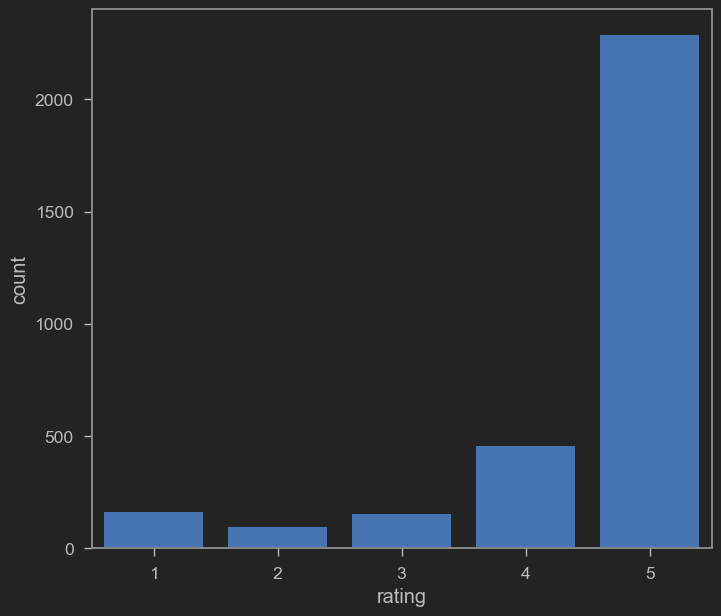

In [20]:
# Plot the count plot for the ratings
sns.countplot(x = reviews_df['rating'])

Number of positive feedback: 2893
Number of positive feedback: 257


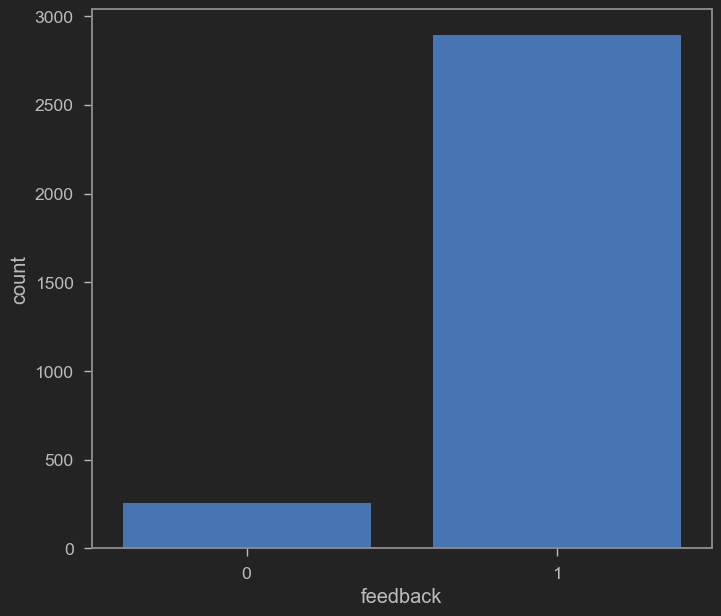

In [21]:
sns.countplot(x='feedback', data=reviews_df)

positive_count = (reviews_df['feedback'] == 1).sum()
print("Number of positive feedback:", positive_count)

negative_count = (reviews_df['feedback'] == 0).sum()
print("Number of positive feedback:", negative_count)

# Data Exploration

In [22]:


#or


# Fill NaN values with empty strings
reviews_df['verified_reviews'].fillna('', inplace=True)

# Calculate the length of each string in the 'verified_reviews' column
reviews_df['length'] = reviews_df['verified_reviews'].apply(lambda x: len(str(x)))

# Display the DataFrame with the new column
#print(reviews_df)


C:\Users\Arei\AppData\Local\Temp\ipykernel_17800\1065805814.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  reviews_df['verified_reviews'].fillna('', inplace=True)


In [23]:
reviews_df

,rating,variation,verified_reviews,feedback,length
0,5,Charcoal Fabric,Love my Echo!,1,13
1,5,Charcoal Fabric,Loved it!,1,9
2,4,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,Charcoal Fabric,Music,1,5
...,...,...,...,...,...
3145,5,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,50
3146,5,Black Dot,"Listening to music, searching locations, check...",1,135
3147,5,Black Dot,"I do love these things, i have them running my...",1,441
3148,5,White Dot,Only complaint I have is that the sound qualit...,1,380


(array([766., 568., 401., 302., 201., 166., 128., 112.,  79.,  59.,  58.,
         44.,  31.,  33.,  19.,  28.,  20.,   7.,  14.,  12.,  17.,   9.,
          6.,  13.,   6.,   8.,   1.,   8.,   1.,   3.,   4.,   2.,   1.,
          5.,   3.,   0.,   1.,   0.,   0.,   2.,   1.,   0.,   0.,   0.,
          0.,   3.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
          0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([   0.  ,   28.51,   57.02,   85.53,  114.04,  142.55,  171.06,
         199.57,  228.08,  256.59,  285.1 ,  313.61,  342.12,  370.63,
         399.14,  427.65,  456.16,  484.67,  513.18,  541.69,  570.2 ,
         598.71,  627.22,  655.73,  684.24,  712.75,  741.26,  769.77,
         798.28,  826.79,  855.3 ,

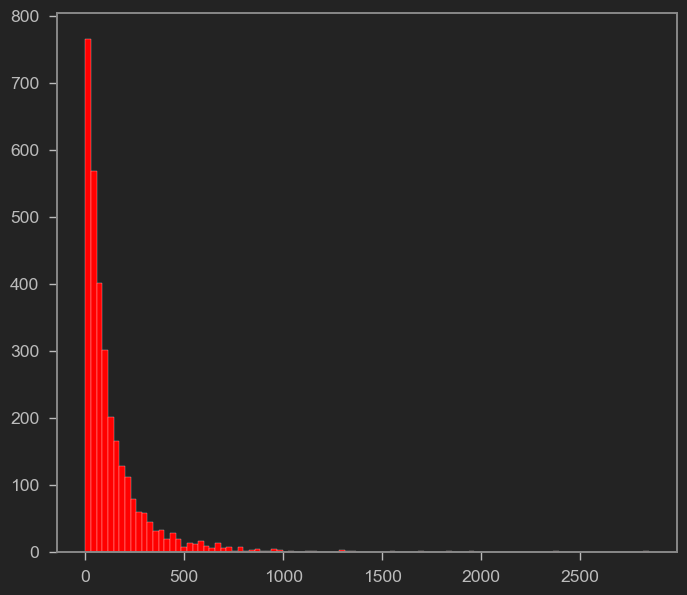

In [24]:
# Plot the histogram for the length
length = 'length'
plt.hist(reviews_df[length], bins=100, color='red', edgecolor='white')

In [25]:
# Apply the describe method to get statistical summary
reviews_df.describe()


,rating,feedback,length
count,3150.000000,3150.000000,3150.000000
mean,4.463175,0.918413,132.048254
std,1.068506,0.273778,182.100859
min,1.000000,0.000000,0.000000
25%,4.000000,1.000000,30.000000
50%,5.000000,1.000000,74.000000
75%,5.000000,1.000000,165.000000
max,5.000000,1.000000,2851.000000


In [26]:
# longest message 

reviews_df[reviews_df['length'] == 2851.000000]


,rating,variation,verified_reviews,feedback,length
2016,5,Black Plus,Incredible piece of technology.I have this rig...,1,2851


In [27]:
reviews_df[reviews_df['length'] == 2851.000000]['verified_reviews'].iloc[0]

"Incredible piece of technology.I have this right center of my living room on an island kitchen counter. The mic and speaker goes in every direction and the quality of the sound is quite good. I connected the Echo via Bluetooth to my Sony soundbar on my TV but find the Echo placement and 360 sound more appealing. It's no audiophile equipment but there is good range and decent bass. The sound is more than adequate for any indoor entertaining and loud enough to bother neighbors in my building. The knob on the top works great for adjusting volume. This is my first Echo device and I would imagine having to press volume buttons (on the Echo 2) a large inconvenience and not as precise. For that alone I would recommend this over the regular Echo (2nd generation).The piece looks quality and is quite sturdy with some weight on it. The rubber material on the bottom has a good grip on the granite counter-- my cat can even rub her scent on it without tipping it over.This order came with a free Phi

In [28]:
# view message with the verage length
average_length = 132.048254

closest_length_row = reviews_df.iloc[(reviews_df['length'] - average_length).abs().idxmin()]
print("Message with closest average length:\n", closest_length_row['verified_reviews'])


Message with closest average length:
 Nice. It works good.Some times is not easy to recognize your voice and you have to repeat several times, some time almost screaming.


# Plotting WordCloud

In [29]:
# Obtain only the positive reviews

positive = reviews_df[reviews_df['feedback']   ==  1]
positive


,rating,variation,verified_reviews,feedback,length
0,5,Charcoal Fabric,Love my Echo!,1,13
1,5,Charcoal Fabric,Loved it!,1,9
2,4,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,Charcoal Fabric,Music,1,5
...,...,...,...,...,...
3145,5,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,50
3146,5,Black Dot,"Listening to music, searching locations, check...",1,135
3147,5,Black Dot,"I do love these things, i have them running my...",1,441
3148,5,White Dot,Only complaint I have is that the sound qualit...,1,380


In [30]:
# Obtain only the negative reviews

negative = reviews_df[reviews_df['feedback']   ==  0]
negative

,rating,variation,verified_reviews,feedback,length
46,2,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc...",0,163
111,2,Charcoal Fabric,Sound is terrible if u want good music too get...,0,53
141,1,Charcoal Fabric,Not much features.,0,18
162,1,Sandstone Fabric,"Stopped working after 2 weeks ,didn't follow c...",0,87
176,2,Heather Gray Fabric,Sad joke. Worthless.,0,20
...,...,...,...,...,...
3047,1,Black Dot,Echo Dot responds to us when we aren't even ta...,0,120
3048,1,White Dot,NOT CONNECTED TO MY PHONE PLAYLIST :(,0,37
3067,2,Black Dot,The only negative we have on this product is t...,0,240
3091,1,Black Dot,I didn’t order it,0,17


In [31]:
# convert to list format 
#positive_reviews_list = positive.values.tolist()
#len(positive_reviews_list)

positive_reviews_list = positive['verified_reviews'].tolist()
len(positive_reviews_list)


2893

In [32]:
# join all reviews into one large strong

large_string  = ' '.join(positive_reviews_list)

large_string

'Love my Echo! Loved it! Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home. I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well. Music I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do. Without having a cellphone, I cannot use many of her features. I have an iPad but do not see that of any use.  It IS a great alarm.  If u r almost deaf, you can hear her alarm in the bedroom from out in the living room, so that is reason enough to keep her.It is fun to ask random questions to hear her response.  She does not seem to be very smartbon politics yet. I think this is the 5th one I\'ve purchased. I\'m working on 

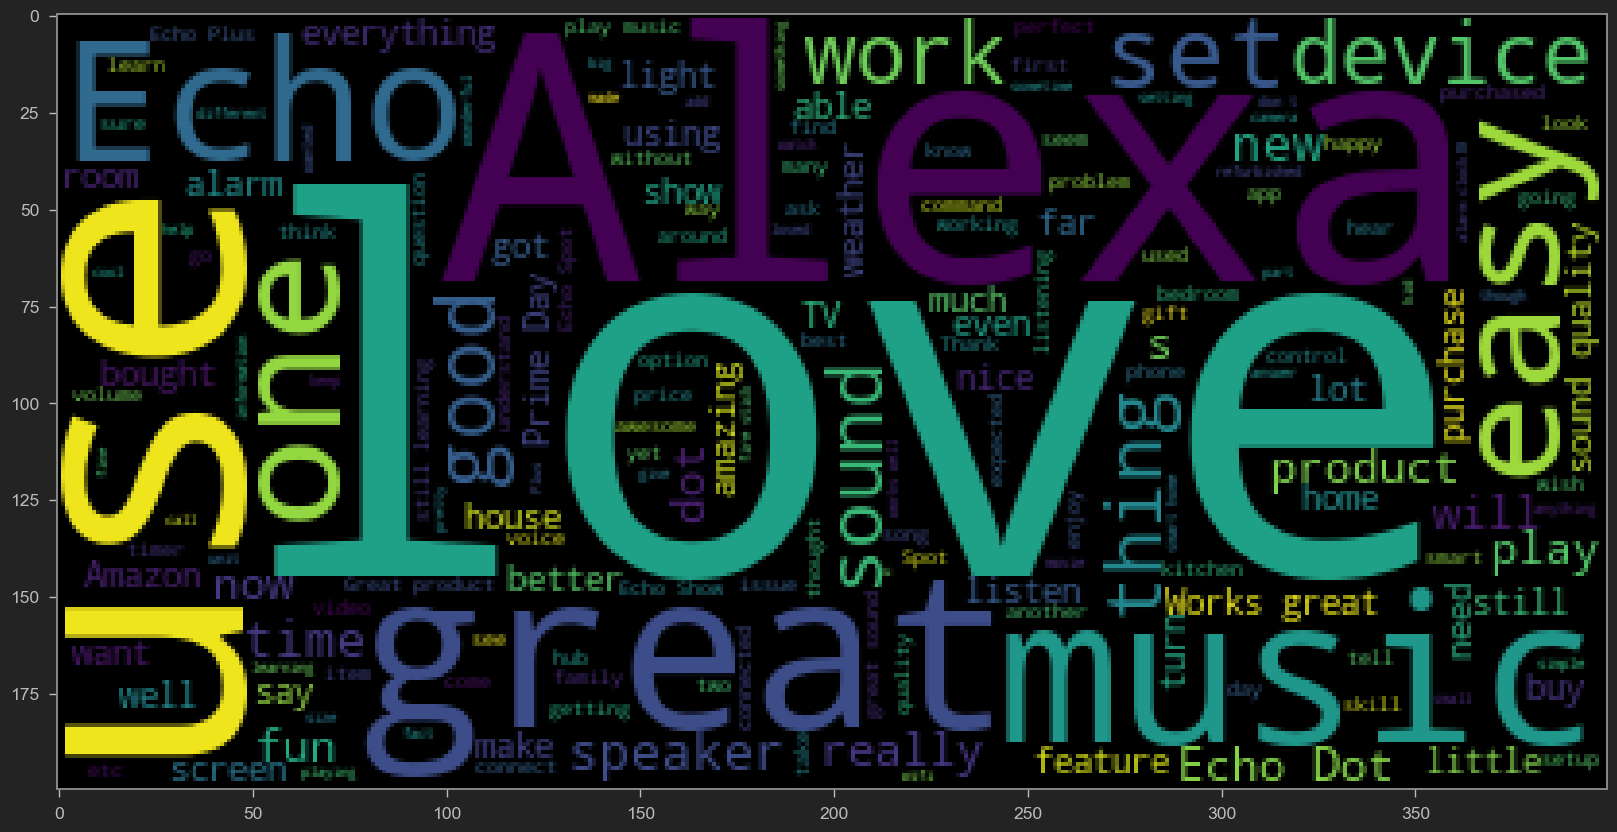

In [35]:
# positive feedback wordcloud

plt.figure(figsize=(10,10))
plt.imshow(WordCloud().generate(large_string))

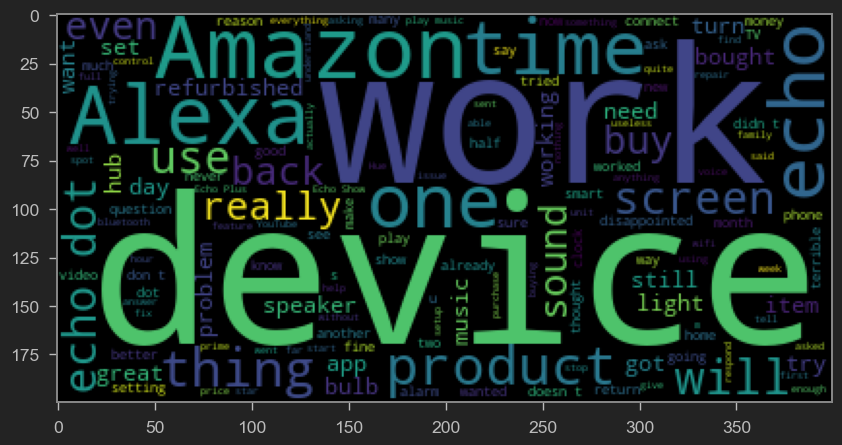

In [40]:
#Plot the wordcloud for the negative datafram
negative_reviews_list = negative['verified_reviews'].tolist()
len(negative_reviews_list)



large_string_negative = ' '.join(negative_reviews_list)

large_string_negative


plt.figure(figsize=(10,10))
plt.imshow(WordCloud().generate(large_string_negative))

